In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import nltk
import tslearn
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import timestring
import datetime

In [2]:
missing_values = ["n/a", "na", "--"]

In [3]:
stock = pd.read_csv("AprilData.csv", sep = ",", na_values = missing_values)
news = pd.read_csv("newsdata.csv", sep=",",na_values = missing_values)
combained = pd.read_csv("combined.csv", sep = ",",na_values = missing_values)
news.head()



,Id,newsdate,companyname,headline,article,link,created_at
0,1,"April 30, 2019 10:41 am +08",PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57
1,2,"April 29, 2019 12:30 pm +08",PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58
2,3,"April 29, 2019 10:54 am +08",PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58
3,4,"April 29, 2019 09:17 am +08",PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59
4,5,"April 29, 2019 07:11 am +08",PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59


In [4]:
stock.drop(["Id","created_at"], axis=1, inplace=True)
stock.head()

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
0,2019-04-01 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,20000
1,2019-04-02 16:00:00,main_market,healthcare,ADVENTA,7191,0.350,0.350,0.350,0.350,1000
2,2019-04-03 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.355,0.355,5000
3,2019-04-04 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,32000
4,2019-04-07 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,31600


In [5]:
stock_missing = stock.isnull().sum()
news_missing = news.isnull().sum()

In [6]:
print(stock_missing,news_missing)

stockdate      0
sector         0
subsector      0
companyname    0
stockcode      0
openprice      0
highprice      0
lowprice       0
lastprice      0
volume         0
dtype: int64 Id             0
newsdate       0
companyname    0
headline       0
article        0
link           0
created_at     0
dtype: int64


In [7]:
stock.dtypes

stockdate       object
sector          object
subsector       object
companyname     object
stockcode       object
openprice      float64
highprice      float64
lowprice       float64
lastprice      float64
volume           int64
dtype: object

In [8]:
stock.describe

<bound method NDFrame.describe of                  stockdate       sector     subsector companyname stockcode  \
0      2019-04-01 16:00:00  main_market    healthcare     ADVENTA      7191   
1      2019-04-02 16:00:00  main_market    healthcare     ADVENTA      7191   
2      2019-04-03 16:00:00  main_market    healthcare     ADVENTA      7191   
3      2019-04-04 16:00:00  main_market    healthcare     ADVENTA      7191   
4      2019-04-07 16:00:00  main_market    healthcare     ADVENTA      7191   
5      2019-04-08 16:00:00  main_market    healthcare     ADVENTA      7191   
6      2019-04-09 16:00:00  main_market    healthcare     ADVENTA      7191   
7      2019-04-10 16:00:00  main_market    healthcare     ADVENTA      7191   
8      2019-04-11 16:00:00  main_market    healthcare     ADVENTA      7191   
9      2019-04-14 16:00:00  main_market    healthcare     ADVENTA      7191   
10     2019-04-15 16:00:00  main_market    healthcare     ADVENTA      7191   
11     2019-04-16 

In [9]:
stock["sector"].unique()

array(['main_market', 'ace_market', 'bond_loan', 'warrants', 'etf'],
      dtype=object)

In [10]:
stock["subsector"].unique()

array(['healthcare', 'energy', 'tecnology', 'properties', 'utilities',
       'finance', 'telco_media', 'consumer', 'constructn', 'reits',
       'ind-prod', 'plantation', 'transport', 'closedfund', 'technology',
       'bondislamic', 'etfbond', 'etfequity', 'etfcommodity'],
      dtype=object)

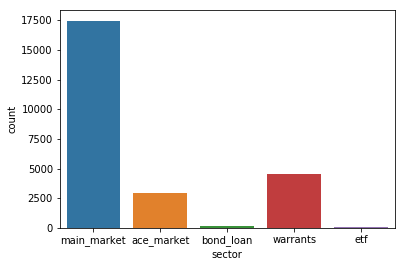

In [11]:
sns.countplot(x = stock["sector"])

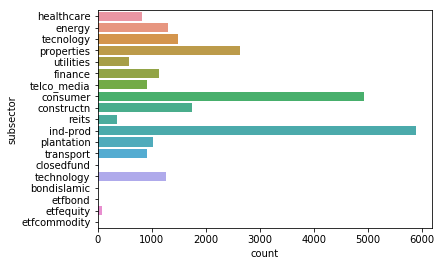

In [12]:
sns.countplot(y = stock["subsector"])

In [13]:
news.dtypes

Id              int64
newsdate       object
companyname    object
headline       object
article        object
link           object
created_at     object
dtype: object

In [14]:
news["newsdate"]= news["newsdate"].apply(lambda x:timestring.Date(x).date)
news.head()

,Id,newsdate,companyname,headline,article,link,created_at
0,1,2019-04-30 10:41:00,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57
1,2,2019-04-29 12:30:00,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58
2,3,2019-04-29 10:54:00,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58
3,4,2019-04-29 09:17:00,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59
4,5,2019-04-29 07:11:00,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59


In [15]:
news["newsdate"] = news["newsdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
news.head()

,Id,newsdate,companyname,headline,article,link,created_at
0,1,2019-04-30,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57
1,2,2019-04-29,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58
2,3,2019-04-29,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58
3,4,2019-04-29,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59
4,5,2019-04-29,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59


In [16]:
news["headlinepolarity"] = [TextBlob(news["headline"].iloc[i]).polarity for i in range(0,news.shape[0])]

In [17]:
news["articlepolarity"] = [TextBlob(news["article"].iloc[i]).polarity for i in range(0,news.shape[0])]
news.head()

,Id,newsdate,companyname,headline,article,link,created_at,headlinepolarity,articlepolarity
0,1,2019-04-30,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57,0.000000,0.041020
1,2,2019-04-29,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58,0.000000,-0.020236
2,3,2019-04-29,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58,0.000000,0.025275
3,4,2019-04-29,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59,0.285714,-0.008036
4,5,2019-04-29,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59,0.000000,-0.047009


In [18]:
news['polarity'] = news[['headlinepolarity','articlepolarity']].sum(axis=1)
news.head()

,Id,newsdate,companyname,headline,article,link,created_at,headlinepolarity,articlepolarity,polarity
0,1,2019-04-30,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57,0.000000,0.041020,0.041020
1,2,2019-04-29,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58,0.000000,-0.020236,-0.020236
2,3,2019-04-29,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58,0.000000,0.025275,0.025275
3,4,2019-04-29,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59,0.285714,-0.008036,0.277679
4,5,2019-04-29,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59,0.000000,-0.047009,-0.047009


In [19]:
PETRONAS_news = news
TM_news = news
GAMUDA_news = news
AIRASIA_news = news


In [20]:
PETRONAS_news = PETRONAS_news.iloc[np.where(news["companyname"]=="PETRONAS")]
PETRONAS_news

TM_news = TM_news.iloc[np.where(news["companyname"]=="TM")]
# TM_news

GAMUDA_news = GAMUDA_news.iloc[np.where(news["companyname"]=="GAMUDA")]
# GAMUDA_news

AIRASIA_news = AIRASIA_news.iloc[np.where(news["companyname"]=="AIRASIA")]
# AIRASIA_news



In [21]:
PETRONAS_news.index = pd.to_datetime(PETRONAS_news["newsdate"])
TM_news.index = pd.to_datetime(TM_news["newsdate"])
GAMUDA_news.index = pd.to_datetime(GAMUDA_news["newsdate"])
AIRASIA_news.index = pd.to_datetime(AIRASIA_news["newsdate"])




In [22]:
PETRONAS_news1 = PETRONAS_news.loc["2019-04-30":"2019-04-01"].resample("B").sum()
# PETRONAS_news1

TM_news1 = TM_news.loc["2019-04-30":"2019-04-01"].resample("B").sum()
# TM_news1 

GAMUDA_news1 = GAMUDA_news.loc["2019-04-30":"2019-04-01"].resample("B").sum()
# GAMUDA_news1 

AIRASIA_news1 = AIRASIA_news.loc["2019-04-30":"2019-04-01"].resample("B").sum()
# AIRASIA_news1 



In [23]:
PETRONAS_news1

,Id,headlinepolarity,articlepolarity,polarity
newsdate,,,,
2019-04-02,724,0.216667,0.502007,0.718674
2019-04-03,86,0.318182,0.076350,0.394532
2019-04-04,169,-0.237500,0.182032,-0.055468
2019-04-05,405,0.200000,0.342162,0.542162
2019-04-08,306,0.300000,0.603960,0.903960
2019-04-09,74,0.000000,-0.001299,-0.001299
2019-04-10,286,0.000000,0.342159,0.342159
2019-04-11,335,0.333333,0.404548,0.737882
2019-04-12,999,-0.422222,0.397601,-0.024621


In [24]:
def polarity_cat (x):
       
    if (x> 0) :
        return "positive"
    elif (x<0):
        return "negative"
    else:
        return "neutral" 

In [25]:
PETRONAS_news1["headlinepolarity_cat"] = PETRONAS_news1["headlinepolarity"].apply(polarity_cat)
PETRONAS_news1

TM_news1["headlinepolarity_cat"] = TM_news1["headlinepolarity"].apply(polarity_cat)
TM_news1

GAMUDA_news1["headlinepolarity_cat"] = GAMUDA_news1["headlinepolarity"].apply(polarity_cat)
GAMUDA_news1

AIRASIA_news1["headlinepolarity_cat"] = AIRASIA_news1["headlinepolarity"].apply(polarity_cat)
AIRASIA_news1


,Id,headlinepolarity,articlepolarity,polarity,headlinepolarity_cat
newsdate,,,,,
2019-04-02,1728,0.000000,0.431201,0.431201,neutral
2019-04-03,1147,0.285714,0.306698,0.592413,positive
2019-04-04,0,0.000000,0.000000,0.000000,neutral
2019-04-05,0,0.000000,0.000000,0.000000,neutral
2019-04-08,1143,0.250000,0.222521,0.472521,positive
2019-04-09,570,0.000000,-0.003579,-0.003579,neutral
2019-04-10,1137,-0.155556,-0.059905,-0.215460,negative
2019-04-11,0,0.000000,0.000000,0.000000,neutral
2019-04-12,1133,0.000000,0.129596,0.129596,neutral


In [26]:
# sns.countplot(PETRONAS_news1["headlinepolarity_cat"])
# sns.countplot(TM_news1["headlinepolarity_cat"])
# sns.countplot(GAMUDA_news1["headlinepolarity_cat"])
# sns.countplot(AIRASIA_news1["headlinepolarity_cat"])

In [27]:
PETRONAS_stock = stock.loc[np.where(stock["companyname"]=="PETRONM")]
# PETRONAS_stock

TM_stock = stock.loc[np.where(stock["companyname"]=="TM")]
# TM_stock

GAMUDA_stock = stock.loc[np.where(stock["companyname"]=="GAMUDA")]
# GAMUDA_stock

AIRASIA_stock = stock.loc[np.where(stock["companyname"]=="AIRASIA")]
# AIRASIA_stock


In [28]:
PETRONAS_stock["stockdate"] = PETRONAS_stock["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
PETRONAS_stock.head()

TM_stock["stockdate"] = TM_stock["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
TM_stock.head()

GAMUDA_stock["stockdate"] = GAMUDA_stock["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
GAMUDA_stock.head()

AIRASIA_stock["stockdate"] = AIRASIA_stock["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
AIRASIA_stock.head()


,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
5925,2019-04-01,main_market,consumer,AIRASIA,5099,2.65,2.68,2.64,2.65,3738400
5926,2019-04-02,main_market,consumer,AIRASIA,5099,2.67,2.68,2.65,2.67,3208400
5927,2019-04-03,main_market,consumer,AIRASIA,5099,2.66,2.68,2.65,2.67,4548500
5928,2019-04-04,main_market,consumer,AIRASIA,5099,2.68,2.68,2.64,2.65,4045200
5929,2019-04-07,main_market,consumer,AIRASIA,5099,2.65,2.68,2.61,2.67,6462300


In [29]:
PETRONAS_stock.index = pd.to_datetime(PETRONAS_stock["stockdate"])
PETRONAS_stock.loc['2019-04-01':]

TM_stock.index = pd.to_datetime(TM_stock["stockdate"])
TM_stock.loc['2019-04-01':]

GAMUDA_stock.index = pd.to_datetime(GAMUDA_stock["stockdate"])
GAMUDA_stock.loc['2019-04-01':]

AIRASIA_stock.index = pd.to_datetime(AIRASIA_stock["stockdate"])
AIRASIA_stock.loc['2019-04-01':]


,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,,,,,,,,,,
2019-04-01,2019-04-01,main_market,consumer,AIRASIA,5099,2.65,2.68,2.64,2.65,3738400
2019-04-02,2019-04-02,main_market,consumer,AIRASIA,5099,2.67,2.68,2.65,2.67,3208400
2019-04-03,2019-04-03,main_market,consumer,AIRASIA,5099,2.66,2.68,2.65,2.67,4548500
2019-04-04,2019-04-04,main_market,consumer,AIRASIA,5099,2.68,2.68,2.64,2.65,4045200
2019-04-07,2019-04-07,main_market,consumer,AIRASIA,5099,2.65,2.68,2.61,2.67,6462300
2019-04-08,2019-04-08,main_market,consumer,AIRASIA,5099,2.67,2.67,2.60,2.60,9284400
2019-04-09,2019-04-09,main_market,consumer,AIRASIA,5099,2.61,2.62,2.52,2.53,12435600
2019-04-10,2019-04-10,main_market,consumer,AIRASIA,5099,2.54,2.56,2.45,2.47,12700500
2019-04-11,2019-04-11,main_market,consumer,AIRASIA,5099,2.50,2.52,2.48,2.49,5411100


In [30]:
PETRONAS_combained = combained
PETRONAS_combained.head()

TM_combained = combained
TM_combained.head()

GAMUDA_combained = combained
GAMUDA_combained.head()

AIRASIA_combained = combained
AIRASIA_combained.head()


,Unnamed: 0,date,goldprice,silverprice,oilprice,gasprice
0,2019-04-01,2019-04-01,15.099,15.099,69.010002,2.708
1,2019-04-02,2019-04-02,15.061,15.061,69.370003,2.684
2,2019-04-03,2019-04-03,15.102,15.102,69.309998,2.677
3,2019-04-04,2019-04-04,15.084,15.084,69.400002,2.643
4,2019-04-05,2019-04-05,15.086,15.086,70.339996,2.664


In [31]:
PETRONAS_combained["date"] = PETRONAS_combained["date"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
PETRONAS_combained.head()

TM_combained["date"] = TM_combained["date"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
TM_combained.head()

GAMUDA_combained["date"] = GAMUDA_combained["date"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
GAMUDA_combained.head()

AIRASIA_combained["date"] = AIRASIA_combained["date"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
AIRASIA_combained.head()


,Unnamed: 0,date,goldprice,silverprice,oilprice,gasprice
0,2019-04-01,2019-04-01,15.099,15.099,69.010002,2.708
1,2019-04-02,2019-04-02,15.061,15.061,69.370003,2.684
2,2019-04-03,2019-04-03,15.102,15.102,69.309998,2.677
3,2019-04-04,2019-04-04,15.084,15.084,69.400002,2.643
4,2019-04-05,2019-04-05,15.086,15.086,70.339996,2.664


In [32]:
PETRONAS_combained.index = pd.to_datetime(PETRONAS_combained["date"])
PETRONAS_combained = PETRONAS_combained.loc['2019-04-01':]


TM_combained.index = pd.to_datetime(TM_combained["date"])
TM_combained = TM_combained.loc['2019-04-01':]

GAMUDA_combained.index = pd.to_datetime(GAMUDA_combained["date"])
GAMUDA_combained = GAMUDA_combained.loc['2019-04-01':]

AIRASIA_combained.index = pd.to_datetime(AIRASIA_combained["date"])
AIRASIA_combained = AIRASIA_combained.loc['2019-04-01':]


In [33]:
# PETRONAS_combained
# TM_combained
# GAMUDA_combained
# AIRASIA_combained

In [34]:
PETRONAS = pd.concat([PETRONAS_stock["lastprice"],PETRONAS_combained["goldprice"],
                     PETRONAS_combained["silverprice"],PETRONAS_combained["oilprice"],
                      PETRONAS_combained["gasprice"],PETRONAS_news1["polarity"]]
                      , keys = ["stockprice","goldprice","silverprice","oilprice","gasprice","newspolarity"], axis = 1).ffill().bfill()
PETRONAS

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
2019-04-01,6.58,15.099,15.099,69.010002,2.708,0.718674
2019-04-02,6.56,15.061,15.061,69.370003,2.684,0.718674
2019-04-03,6.57,15.102,15.102,69.309998,2.677,0.394532
2019-04-04,6.58,15.084,15.084,69.400002,2.643,-0.055468
2019-04-05,6.58,15.086,15.086,70.339996,2.664,0.542162
2019-04-07,6.70,15.088,15.088,70.339996,2.664,0.542162
2019-04-08,6.62,15.216,15.216,71.099998,2.708,0.903960
2019-04-09,6.62,15.211,15.211,70.610001,2.699,-0.001299
2019-04-10,6.61,15.244,15.244,71.730003,2.700,0.342159
2019-04-11,6.60,14.867,14.867,70.830002,2.664,0.737882


In [35]:
# PETRONAS.to_csv('PETRONAS.csv')

In [36]:
TM = pd.concat([TM_stock["lastprice"],TM_combained["goldprice"],
                     TM_combained["silverprice"],TM_combained["oilprice"],
                     TM_combained["gasprice"],TM_news1["polarity"]]
                      , keys = ["stockprice","goldprice","silverprice","oilprice","gasprice","newspolarity"], axis = 1).ffill().bfill()
TM

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
2019-04-01,3.17,15.099,15.099,69.010002,2.708,0.434179
2019-04-02,3.14,15.061,15.061,69.370003,2.684,0.434179
2019-04-03,3.13,15.102,15.102,69.309998,2.677,0.476462
2019-04-04,3.10,15.084,15.084,69.400002,2.643,0.135774
2019-04-05,3.10,15.086,15.086,70.339996,2.664,0.000000
2019-04-07,3.09,15.088,15.088,70.339996,2.664,0.000000
2019-04-08,3.05,15.216,15.216,71.099998,2.708,0.000000
2019-04-09,3.04,15.211,15.211,70.610001,2.699,0.000000
2019-04-10,3.05,15.244,15.244,71.730003,2.700,0.000000
2019-04-11,3.06,14.867,14.867,70.830002,2.664,-0.143269


In [37]:
# TM.to_csv('TM.csv')

In [38]:
GAMUDA = pd.concat([GAMUDA_stock["lastprice"],GAMUDA_combained["goldprice"],
                     GAMUDA_combained["silverprice"],GAMUDA_combained["oilprice"],
                     GAMUDA_combained["gasprice"],GAMUDA_news1["polarity"]]
                      , keys = ["stockprice","goldprice","silverprice","oilprice","gasprice","newspolarity"], axis = 1).ffill().bfill()
GAMUDA

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
2019-04-01,2.90,15.099,15.099,69.010002,2.708,0.099362
2019-04-02,3.01,15.061,15.061,69.370003,2.684,0.099362
2019-04-03,3.07,15.102,15.102,69.309998,2.677,0.000000
2019-04-04,3.10,15.084,15.084,69.400002,2.643,0.647851
2019-04-05,3.10,15.086,15.086,70.339996,2.664,0.000000
2019-04-07,3.25,15.088,15.088,70.339996,2.664,0.000000
2019-04-08,3.28,15.216,15.216,71.099998,2.708,0.000000
2019-04-09,3.30,15.211,15.211,70.610001,2.699,0.000000
2019-04-10,3.25,15.244,15.244,71.730003,2.700,0.000000
2019-04-11,3.19,14.867,14.867,70.830002,2.664,-0.089744


In [39]:
# GAMUDA.to_csv('GAMUDA.csv')

In [40]:
AIRASIA = pd.concat([AIRASIA_stock["lastprice"],AIRASIA_combained["goldprice"],
                     AIRASIA_combained["silverprice"],AIRASIA_combained["oilprice"],
                     AIRASIA_combained["gasprice"],AIRASIA_news1["polarity"]]
                      , keys = ["stockprice","goldprice","silverprice","oilprice","gasprice","newspolarity"], axis = 1).ffill().bfill()
AIRASIA

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
2019-04-01,2.65,15.099,15.099,69.010002,2.708,0.431201
2019-04-02,2.67,15.061,15.061,69.370003,2.684,0.431201
2019-04-03,2.67,15.102,15.102,69.309998,2.677,0.592413
2019-04-04,2.65,15.084,15.084,69.400002,2.643,0.000000
2019-04-05,2.65,15.086,15.086,70.339996,2.664,0.000000
2019-04-07,2.67,15.088,15.088,70.339996,2.664,0.000000
2019-04-08,2.60,15.216,15.216,71.099998,2.708,0.472521
2019-04-09,2.53,15.211,15.211,70.610001,2.699,-0.003579
2019-04-10,2.47,15.244,15.244,71.730003,2.700,-0.215460
2019-04-11,2.49,14.867,14.867,70.830002,2.664,0.000000


In [41]:
# AIRASIA.to_csv('AIRASIA.csv')

In [42]:
PETRONAS["polarity_cat"] = PETRONAS["newspolarity"].apply(polarity_cat)
# PETRONAS.head()

TM["polarity_cat"] = TM["newspolarity"].apply(polarity_cat)
# TM.head()

GAMUDA["polarity_cat"] = GAMUDA["newspolarity"].apply(polarity_cat)
GAMUDA.head()

AIRASIA["polarity_cat"] = AIRASIA["newspolarity"].apply(polarity_cat)
# AIRASIA.head()

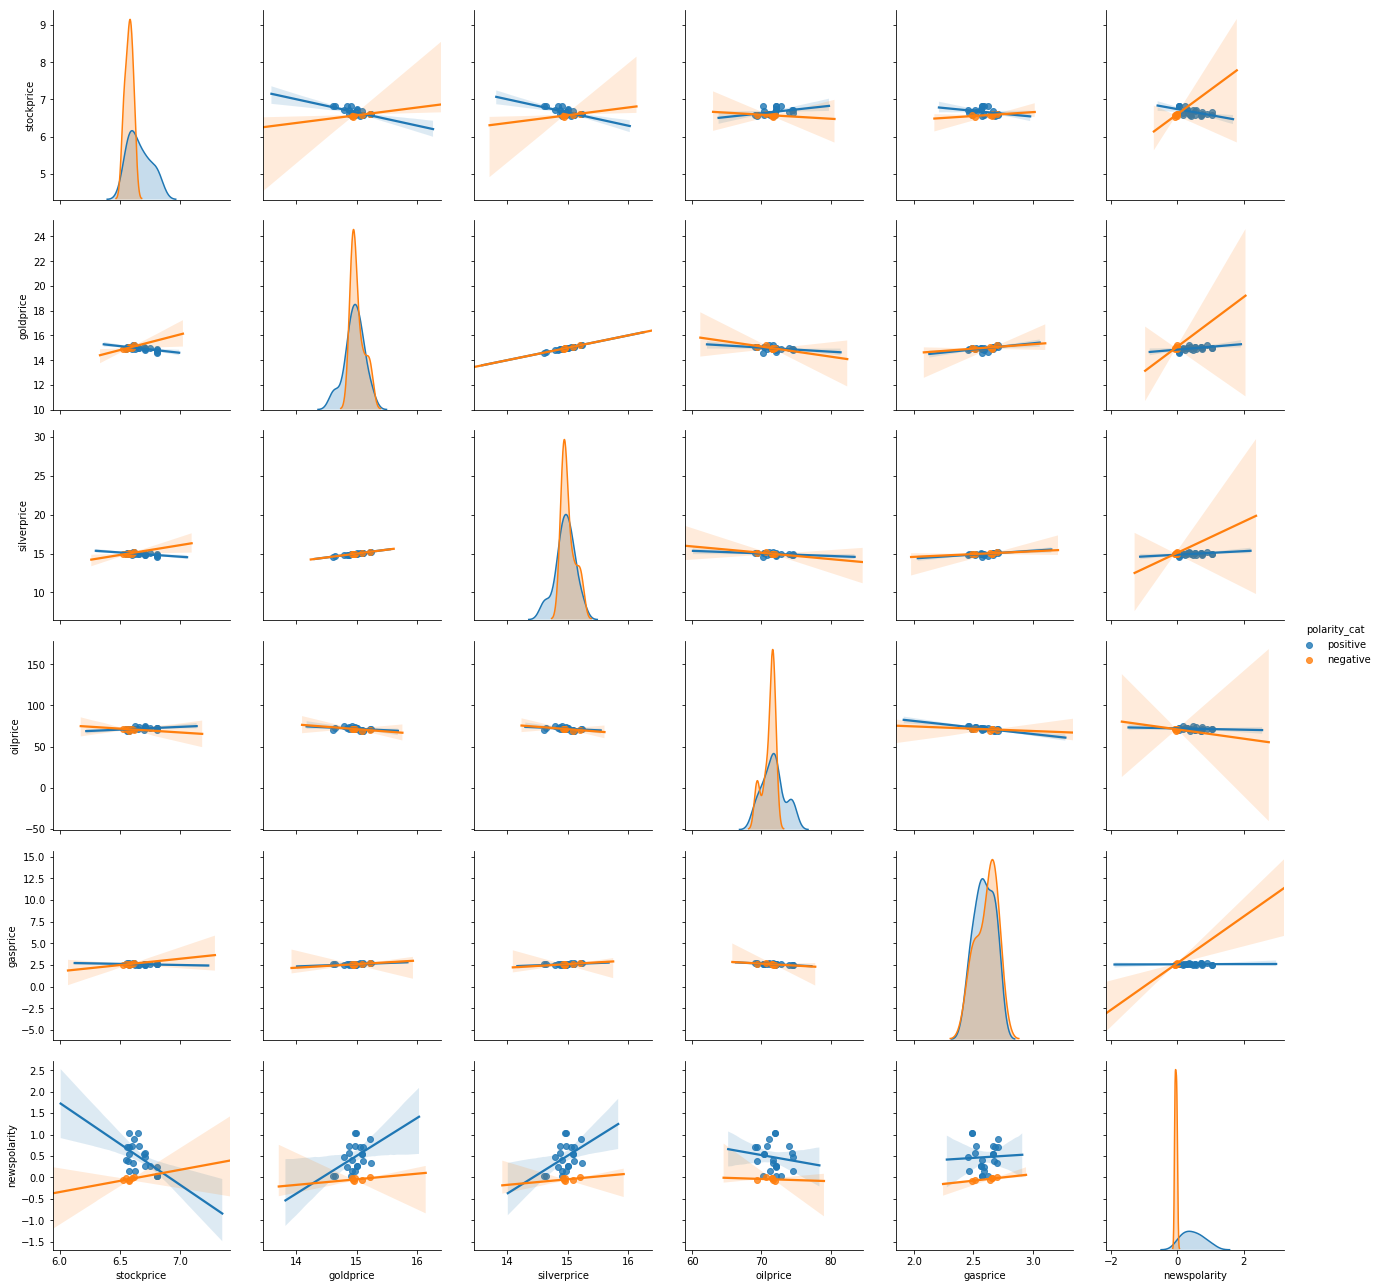

In [52]:
sns.pairplot(PETRONAS,kind="reg",hue="polarity_cat",height=3)

In [ ]:
sns.pairplot(TM,kind="reg",hue="polarity_cat",height=3)

In [45]:
cov_mat = PETRONAS.cov()
cov_mat

cov_mat = TM.cov()
cov_mat

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
stockprice,0.009831,0.008472,0.008478,-0.128233,0.006339,0.005029
goldprice,0.008472,0.022160,0.022188,-0.087909,0.006273,-0.000497
silverprice,0.008478,0.022188,0.022215,-0.087813,0.006275,-0.000502
oilprice,-0.128233,-0.087909,-0.087813,2.313204,-0.092287,-0.105149
gasprice,0.006339,0.006273,0.006275,-0.092287,0.006622,0.000340
newspolarity,0.005029,-0.000497,-0.000502,-0.105149,0.000340,0.031789


In [46]:
corr_mat= PETRONAS.corr()
corr_mat

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
stockprice,1.000000,-0.539923,-0.540189,0.366014,-0.222745,-0.137721
goldprice,-0.539923,1.000000,0.999998,-0.388273,0.517834,0.249953
silverprice,-0.540189,0.999998,1.000000,-0.387374,0.517361,0.250105
oilprice,0.366014,-0.388273,-0.387374,1.000000,-0.745655,-0.010974
gasprice,-0.222745,0.517834,0.517361,-0.745655,1.000000,-0.009850
newspolarity,-0.137721,0.249953,0.250105,-0.010974,-0.009850,1.000000


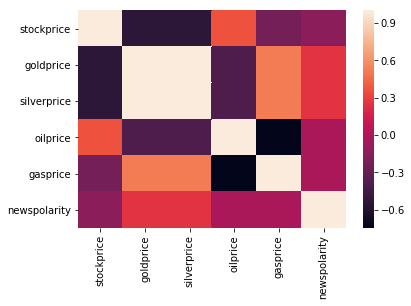

In [47]:
sns.heatmap(corr_mat)

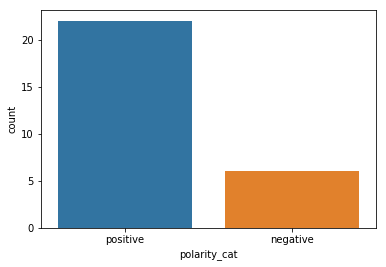

In [48]:
sns.countplot(PETRONAS["polarity_cat"])

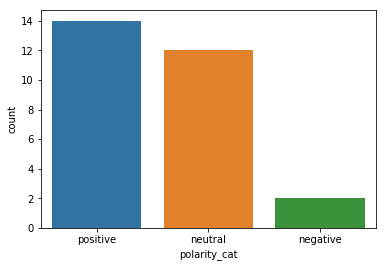

In [49]:
sns.countplot(TM["polarity_cat"])

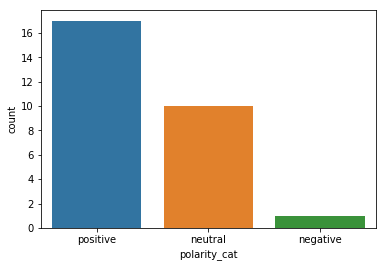

In [50]:
sns.countplot(GAMUDA["polarity_cat"])

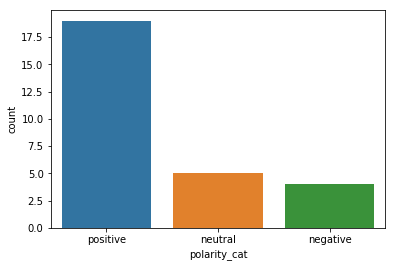

In [51]:
sns.countplot(AIRASIA["polarity_cat"])